# **Telco Customer Churn Prediction**

## Setup and Environment Configuration

### Local Development Setup
For this assignment, all coding and initial testing are executed on a Mac M1 Pro. To effectively manage project dependencies, **Miniconda**—a minimal installer for Conda—has been installed. Miniconda is advantageous for maintaining a clean and specified environment tailored to the project's needs.

### Creating Isolated Environment
A separate Conda environment encapsulates all specific dependencies required for this project, avoiding any conflicts with other Python projects or packages. This strategy is crucial for reproducible results and effective troubleshooting. Here’s how the environment is set up:

1. **Create a new Conda environment:**
   ```bash
   conda create --name churn_prediction python=3.8
   ```
   Python 3.8 is chosen due to its extensive compatibility with data science libraries and proven stability.

2. **Activate the environment:**
   ```bash
   conda activate churn_prediction
   ```

### Code Execution Tools

3. **Jupyter Notebook Setup:**
   Jupyter Notebook is selected as the interactive coding tool. It is installed within the Conda environment:
   ```bash
   conda install jupyter
   ```

4. **Installation of Ipykernel:**
   The installation of `ipykernel` is essential for creating a custom kernel in the Jupyter environment, facilitating the selection of the project's Conda environment directly within Jupyter interfaces:
   ```bash
   conda install ipykernel
   ```

5. **Creating a Custom Kernel:**
   A custom kernel named `telco-churn` is setup after installing `ipykernel` to ensure smooth transitions between different environments in Jupyter tools:
   ```bash
   python -m ipykernel install --user --name churn_prediction --display-name "churn_prediction"
   ```

6. **Launching Jupyter Lab:**
   Jupyter Lab offers enhanced functionality over Jupyter Notebook. It's launched with specific parameters for broader accessibility and functionality:
   ```bash
   jupyter lab --port=8888 --ip=0.0.0.0 --no-browser
   ```
   The command facilitates access to Jupyter Lab over a network on port 8888 and prevents the automatic opening of a browser.

### Additional Tools for Deployment and Cloud Interaction

- **Google Cloud SDK:** Essential for managing and interfacing Google Cloud resources seamlessly.
- **Docker:** Utilized for containerizing the final model to ensure consistent deployments across any platform.
- **gcloud Command-Line Tool:** A critical component of Google Cloud SDK for deploying applications and managing cloud services.

### Final Setup Verification

To confirm the proper configuration of all tools and environments:

1. Execute Python libraries and Jupyter Notebook to ensure functionality within the new Conda environment.
2. Verify the correct installations of the Google Cloud SDK, Docker, and gcloud tools by running respective version-check commands.

This meticulous setup ensures a robust foundation for the subsequent phases of the project, including exploratory data analysis, model development, and the deployment stage, leveraging the full capabilities of the chosen tools and environment.

In [ ]:
# Installing the required Python packages with minimal output
!pip install --quiet pandas numpy matplotlib seaborn statsmodels scipy scikit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Confirming that the libraries have been imported correctly
print("Libraries have been successfully imported!")

# **Phase 1: Exploratory Data Analysis (EDA)**

## Overview
In this phase, we perform thorough Exploratory Data Analysis (EDA) on the Telco Customer Churn dataset. This initial investigation and cleaning process are crucial for developing an accurate predictive model. Our goal in this phase is to prepare a clean and well-understood dataset that is ready for subsequent feature engineering and model development steps.

## EDA Objectives
The following key tasks are executed to achieve a comprehensive understanding and preparation of the dataset:

- **List of Columns**: Identify all columns in the dataset to understand the features available.
- **Dataset Shape**: Determine the size of the dataset to understand the scope of data.
- **Data Types**: Ascertain the data types of each column to identify any necessary conversions.
- **Unique Values**: List all unique values in each column to detect any anomalies or irregularities.
- **Convert Data Types**: Adjust the data types of specific columns as necessary for proper analysis.
- **Handling Missing Values**: Identify and address any missing data in the dataset.
- **Summary Statistics**: Generate summary statistics of numeric columns to gain insights into the distribution and central tendencies of the data.

In [1]:
# Load the dataset
df = pd.read_csv('../data/telco_customer_churn_data.csv')

# Display the first few rows of the dataframe
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# Display the columns in the DataFrame
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [3]:
# Display the size of the DataFrame (rows, columns)
df.shape

(7043, 21)

In [4]:
# Display data types of columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# check for all unique values in each column
for column in df.columns:
    print(f"Unique values in '{column}':", df[column].unique())
    print("Number of unique values:", len(df[column].unique()), "\n\n")

Unique values in 'customerID': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Number of unique values: 7043 


Unique values in 'gender': ['Female' 'Male']
Number of unique values: 2 


Unique values in 'SeniorCitizen': [0 1]
Number of unique values: 2 


Unique values in 'Partner': ['Yes' 'No']
Number of unique values: 2 


Unique values in 'Dependents': ['No' 'Yes']
Number of unique values: 2 


Unique values in 'tenure': [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Number of unique values: 73 


Unique values in 'PhoneService': ['No' 'Yes']
Number of unique values: 2 


Unique values in 'MultipleLines': ['No phone service' 'No' 'Yes']
Number of unique values: 3 


Unique values in 'InternetService': ['DSL' 'Fiber optic' 'No']
Number of unique values: 3 


Unique values 

## Convert data types of columns

In [6]:
# Convert TotalCharges to numeric
# Setting errors='coerce' to turn any problematic values during conversion into NaN 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

## Handling missing values

In [7]:
# Check for missing values after conversion
missing_values = df.isnull().sum()
print("Missing Values After Conversion:\n", missing_values)

Missing Values After Conversion:
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [8]:
# Remove rows where 'TotalCharges' is null as the number of NaN values are low as 11
df = df.dropna(subset=['TotalCharges'])

# Now, your DataFrame should have no null values in 'TotalCharges'
print("Missing Values in 'TotalCharges' after removal:", df['TotalCharges'].isnull().sum())

Missing Values in 'TotalCharges' after removal: 0


In [9]:
# Display summary statistics for numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
# recheck data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

# **Data Visualization**

## Introduction to Visualization Phase
Data visualization is a crucial phase in data analysis for identifying patterns, relationships, and gathering insights that may not be apparent from raw data alone. Effective visualizations can illuminate trends and provide a clearer understanding of the data set's dynamics, particularly in relation to customer churn.

## Visualization Techniques
To comprehensively explore the data, various visualization techniques are employed, each serving distinct purposes in the analysis:

- **Kernel Density Estimate (KDE) Plots**: Useful for understanding the distribution of numerical data.
- **Q-Q Plots**: Help assess if a dataset is distributed a certain way, typically gaussian.
- **Histograms**: Ideal for visualizing the distribution of data and observing the shape.
- **Boxplots**: Provide a graphical representation of the numerical data through their quartiles and are especially useful for detecting outliers.
- **Scatter Plots**: Highlight correlations or dependencies between two variables.
- **Heatmaps**: Useful for visualizing the correlation matrix of variables.
- **Count Plots**: Excellent for visualizing categorical data distributions.

### Plotting Detailed Visualizations
To further analyze and visualize the data, specific Python code leveraging `matplotlib` and `seaborn` libraries is employed. The code snippets enhance the aesthetics and provide detailed insight for each numerical column in the dataset.

### Insights Derived from KDE Plots
Initial observations from Kernel Density Estimate (KDE) plots include:
- **Senior Citizen**: This binary indicator shows peaks at 0 (non-senior) and 1 (senior), indicating the proportion of senior citizens in the dataset.
- **Tenure**: The tenure of customers displays a bimodal distribution, indicating a significant number of new versus long-term customers.
- **Monthly Charges**: The multimodal nature of this distribution suggests different customer segments adhering to varied pricing plans.
- **Total Charges**: Right-skewed distribution suggests that a large number of customers expend lower total amounts over time with fewer instances of very high charges.

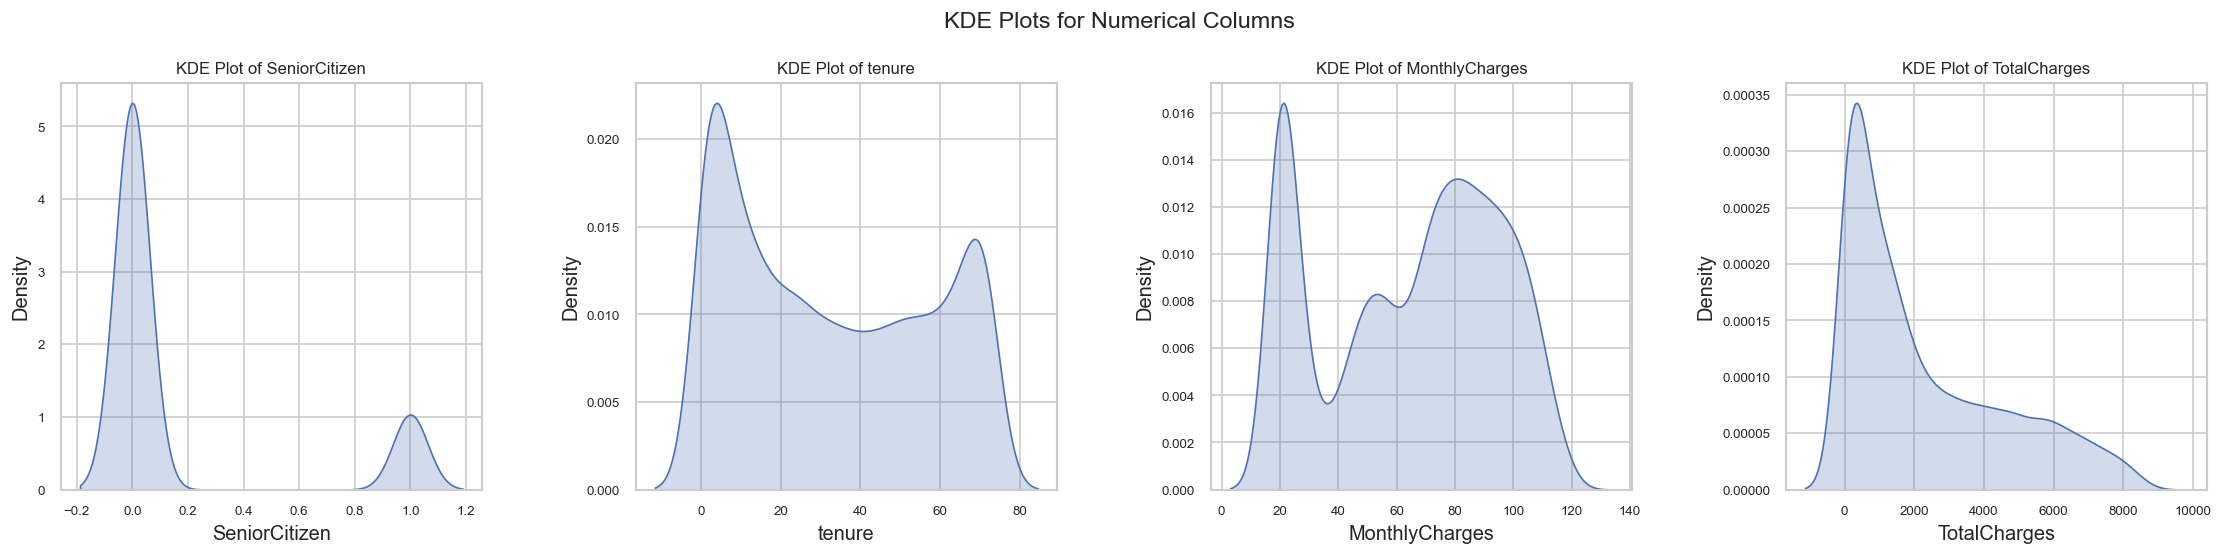

In [11]:
# Enhance default plot aesthetics with Seaborn
sns.set(style="whitegrid")

# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the number of subplot rows needed
n = len(numerical_columns)
n_rows = n // 4 + (n % 4 > 0)

# Create a high-resolution figure
fig, axes = plt.subplots(n_rows, 4, figsize=(20, 5 * n_rows), dpi=120)
fig.tight_layout(pad=5.0)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through the numerical columns to create KDE plots
for i, column in enumerate(numerical_columns):
    sns.kdeplot(data=df, x=column, ax=axes[i], fill=True)
    axes[i].set_title(f'KDE Plot of {column}', fontsize=10)
    axes[i].tick_params(axis='both', which='major', labelsize=8)

# Hide any unused subplot areas
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(top=0.9)  # Adjust the top padding
plt.suptitle('KDE Plots for Numerical Columns', fontsize=14, y=1.02)  # Add a main title and adjust its position
plt.show()


### **Insights from Q-Q Plots:**

- **Senior Citizen**: Since this is a binary variable, the Q-Q plot doesn't provide meaningful information about distribution normality.
- **Tenure**: The Q-Q plot suggests that tenure isn't normally distributed, with a curve rather than a straight line.
- **Monthly Charges**: Shows deviation from normality, particularly at the lower and higher ends, suggesting the presence of pricing plans or groupings.
- **Total Charges**: Indicates a clear departure from normality, with a pronounced curve, which aligns with the right-skew observed in the KDE plot.

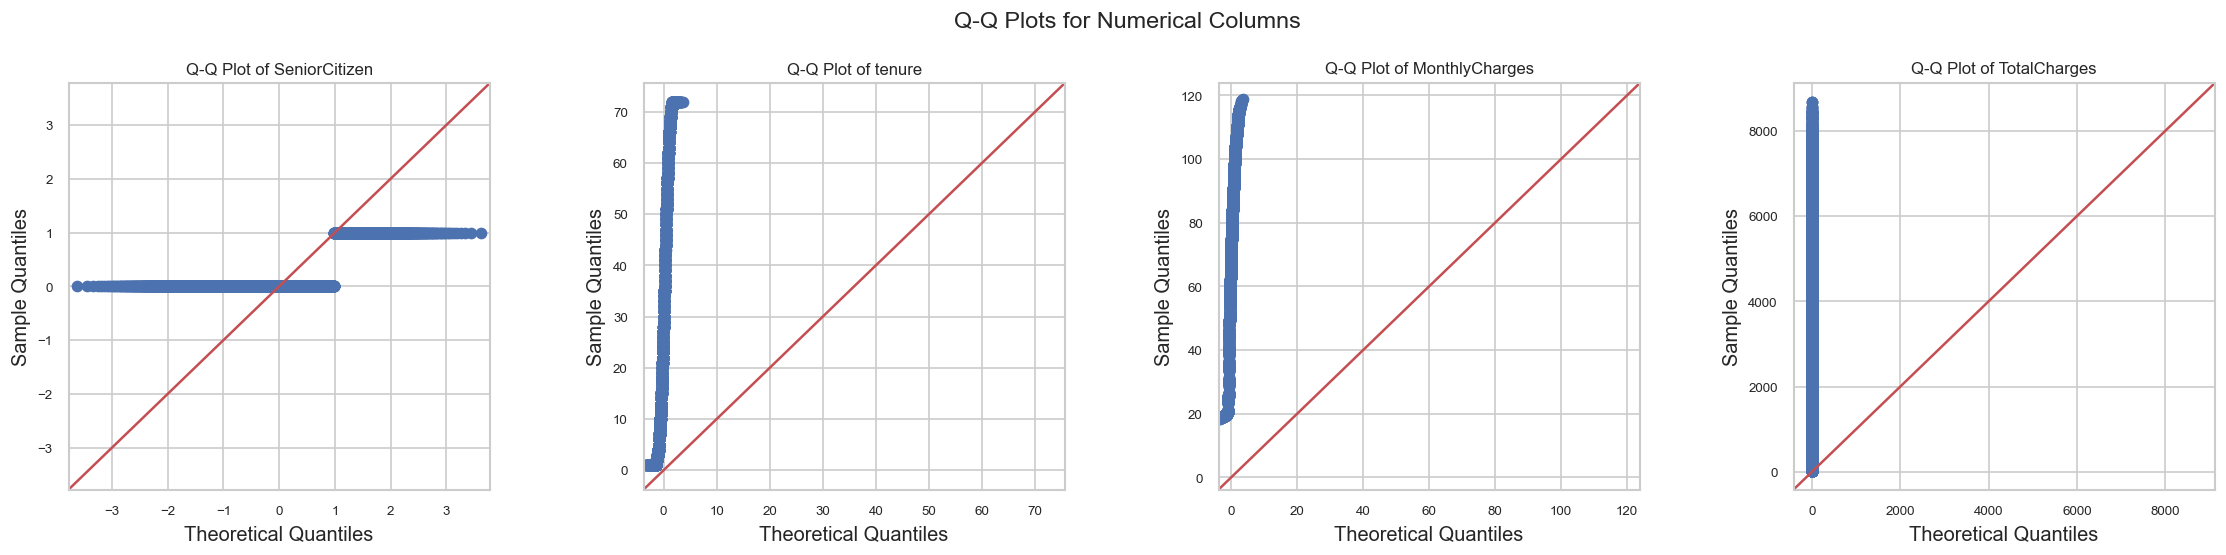

In [12]:
# Enhance default plot aesthetics with Seaborn
sns.set(style="whitegrid")

# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the number of subplot rows needed
n = len(numerical_columns)
n_rows = n // 4 + (n % 4 > 0)

# Create a high-resolution figure
fig, axes = plt.subplots(n_rows, 4, figsize=(20, 5 * n_rows), dpi=120)
fig.tight_layout(pad=5.0)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through the numerical columns to create Q-Q plots
for i, column in enumerate(numerical_columns):
    sm.qqplot(df[column], line='45', ax=axes[i])
    axes[i].set_title(f'Q-Q Plot of {column}', fontsize=10)
    axes[i].tick_params(axis='both', which='major', labelsize=8)

# Hide any unused subplot areas
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(top=0.9)  # Adjust the top padding
plt.suptitle('Q-Q Plots for Numerical Columns', fontsize=14, y=1.02)  # Add a main title and adjust its position
plt.show()


### **Insights from Histograms:**

- The histograms reinforce the insights from the KDE plots, providing a count-based view of the distribution of values within each variable.

### **Insights from Boxplots:**

- **Senior Citizen**: Not very informative due to the binary nature of the variable.
- **Tenure**: The boxplot shows that the median tenure is somewhere around the middle of the range, but there's a wide distribution of customer tenure.
- **Monthly Charges**: The median monthly charge is around the middle of the range, but the distribution is fairly spread out, with a concentration toward the lower end and a long tail toward higher charges.
- **Total Charges**: The median is lower than the average total charge, indicating a skew in the data.

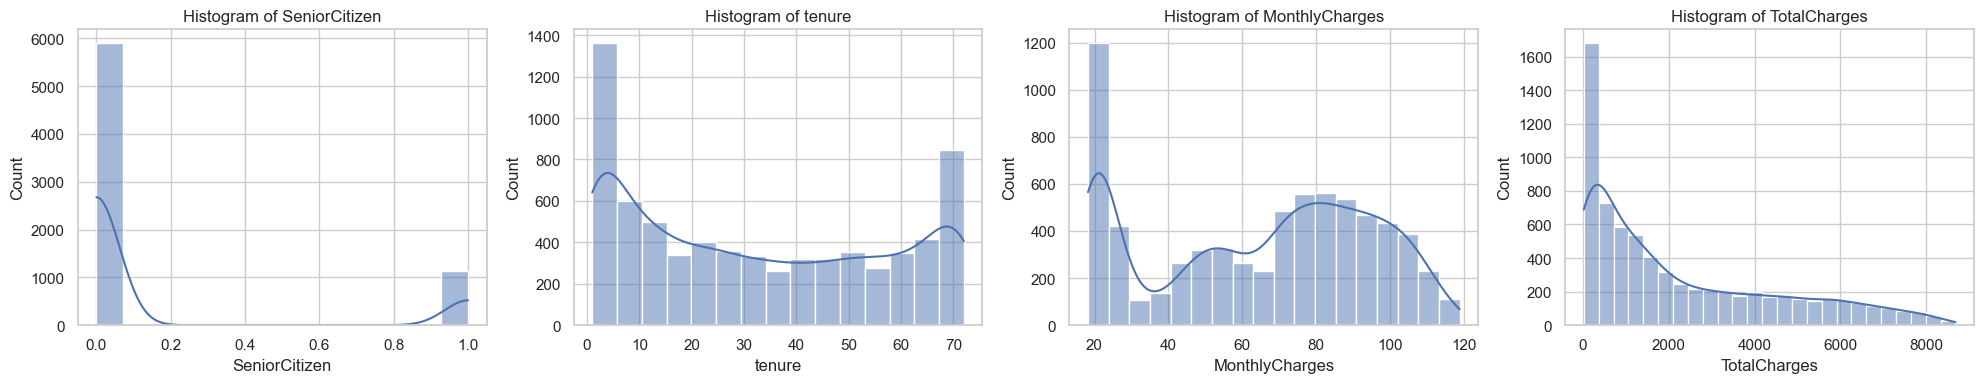

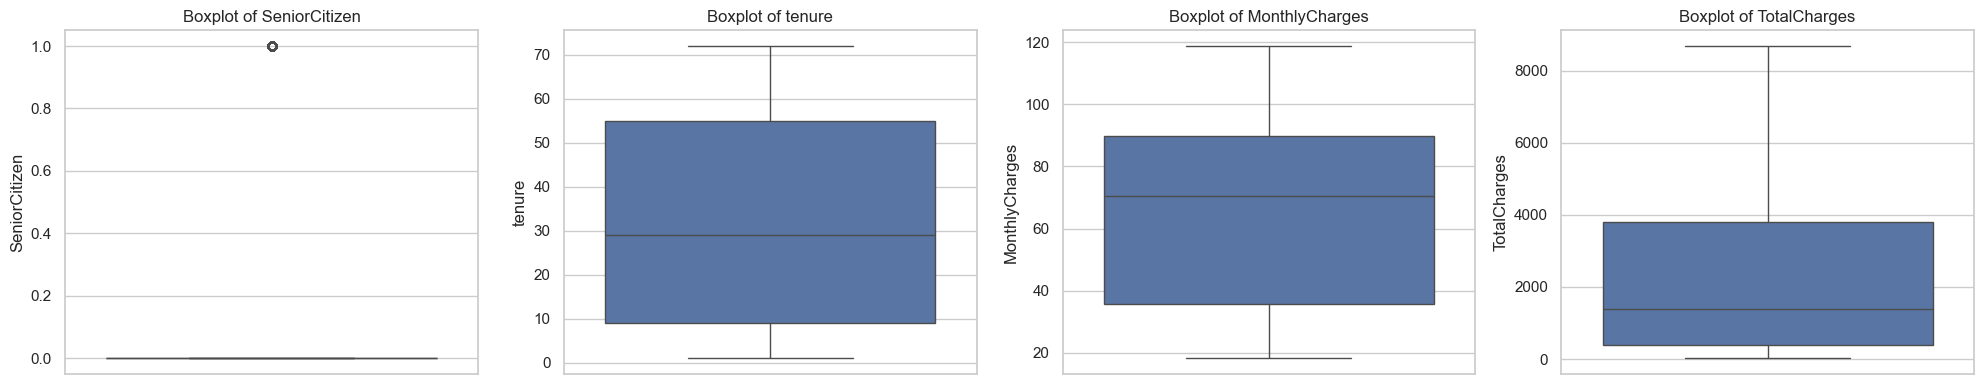

In [13]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Define the layout size
n_cols = 4
n_rows = len(numerical_columns) // n_cols + (len(numerical_columns) % n_cols > 0)

# Plotting Histograms with KDE
plt.figure(figsize=(20, n_rows * 4))
for i, col in enumerate(numerical_columns):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

# Plotting Boxplots
plt.figure(figsize=(20, n_rows * 4))
for i, col in enumerate(numerical_columns):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


### **Insights from Scatter Plots:**

- **Tenure vs. Monthly Charges**: No clear trend, suggesting that the length of tenure doesn't necessarily correlate with the amount of the monthly charge.
- **Tenure vs. Total Charges**: There's a positive trend, which is expected; the longer a customer stays, the higher their total charges accumulate.
- **Monthly Charges vs. Total Charges**: Also, a positive trend, indicating that customers with higher monthly charges tend to have higher total charges over time.

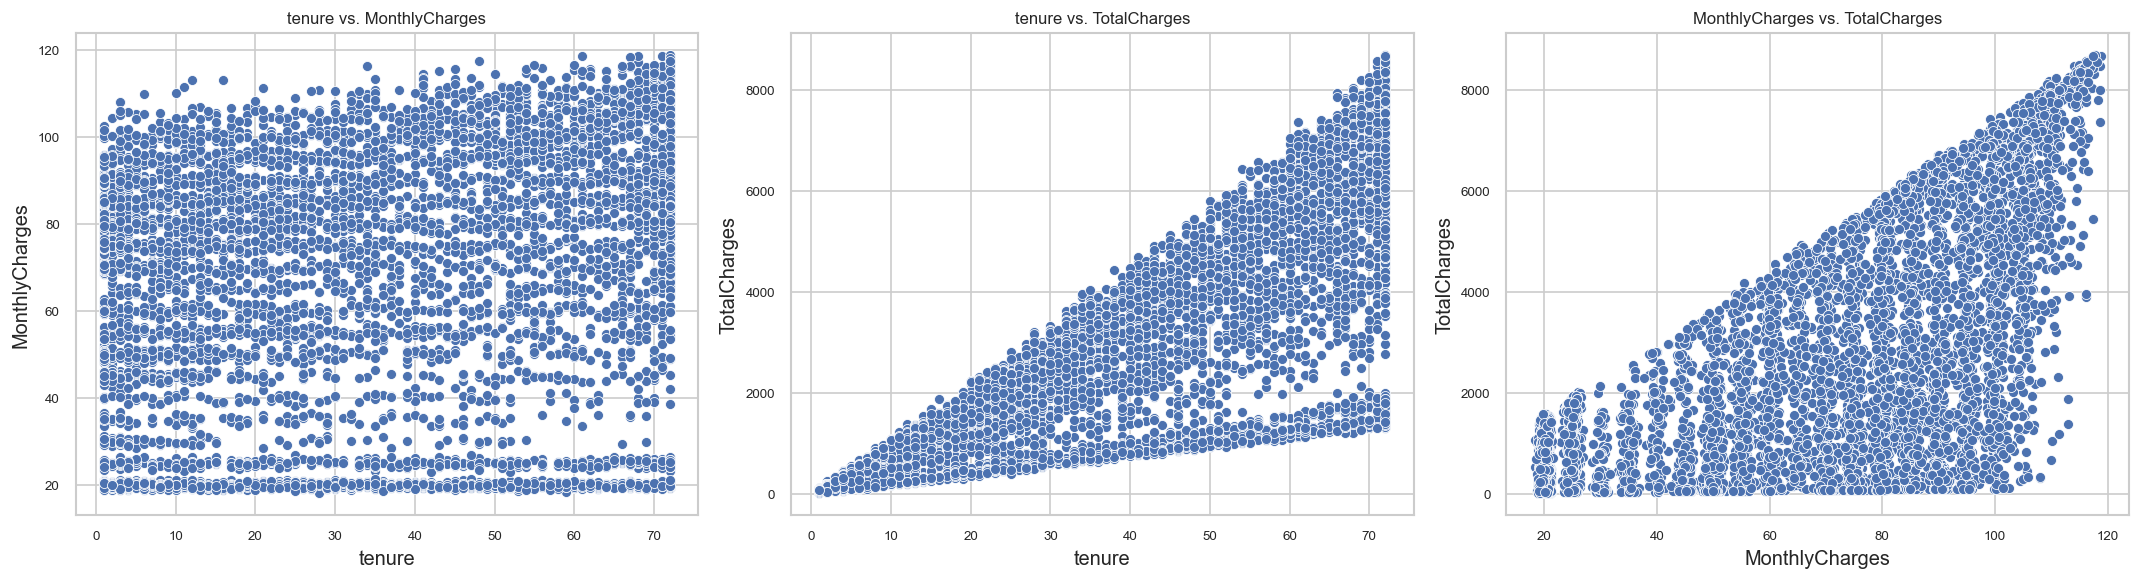

In [14]:
# Enhance default plot aesthetics with Seaborn
sns.set(style="whitegrid")

# Select a subset of numerical columns for scatter plots:
selected_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']  # Adjust based on your dataset

# Prepare combinations for unique pairwise comparisons
combinations = [(selected_columns[i], selected_columns[j]) for i in range(len(selected_columns)) for j in range(i+1, len(selected_columns))]

# Calculate the number of plots needed
n_plots = len(combinations)

# Create a figure for the scatter plots
fig, axes = plt.subplots(1, n_plots, figsize=(6*n_plots, 5), dpi=120)

for i, (col1, col2) in enumerate(combinations):
    sns.scatterplot(data=df, x=col1, y=col2, ax=axes[i])
    axes[i].set_title(f'{col1} vs. {col2}', fontsize=10)
    axes[i].tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()
plt.show()


### **Insights from Heatmap:**

- **Correlation**: The heatmap shows that tenure and total charges are highly correlated, which makes sense as customers with a longer tenure would generally have higher total charges.
- Monthly charges have a moderate correlation with total charges, but a low correlation with tenure.
- Senior citizen status has low correlation with other numerical variables, again expected given its binary nature.

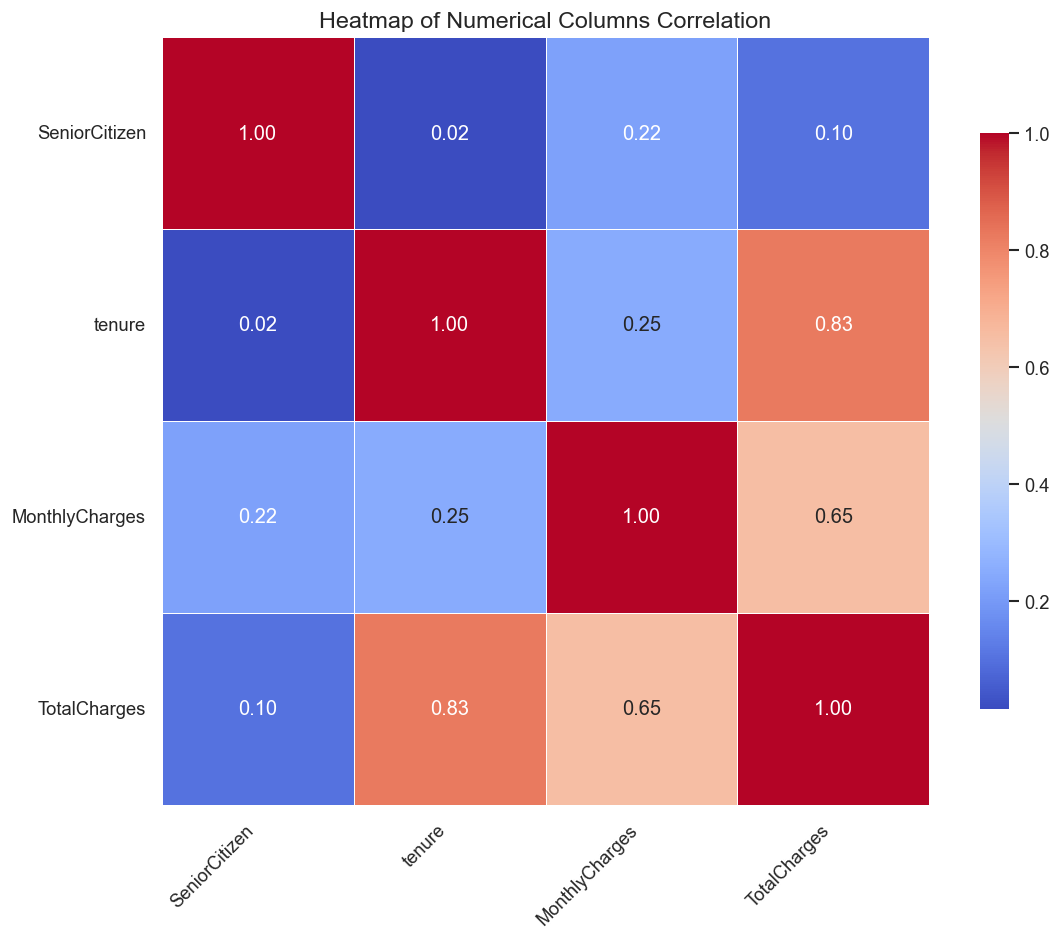

In [15]:
# Enhance default plot aesthetics with Seaborn
sns.set(style="white")

# Calculate the correlation matrix for numerical columns
corr_matrix = df.select_dtypes(include=[np.number]).corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8), dpi=120)  # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .75})
plt.title('Heatmap of Numerical Columns Correlation', fontsize=14)
plt.xticks(rotation=45, ha="right")  # Improve readability of x-axis labels
plt.yticks(rotation=0)  # Ensure y-axis labels are horizontal for readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


### **Insights from Count plots:**

Count plots can be use to analyzing the categorical features with  and to understand the proportion of churn within each category. I have uncovered following wealth of valuble insights from these plots:

- **SeniorCitizen**: A smaller proportion of customers are senior citizens, but within this group, churn seems higher compared to non-senior citizens, indicating they may be a demographic at higher risk of churning.
- **Partner and Dependents**: Customers without a partner or dependents are more likely to churn, which could imply that those with family ties have a reason to stay with the service longer.
- **MultipleLines**: Customers with multiple lines show a slightly higher propensity to churn than those with no multiple lines or no phone service at all.
- **InternetService**: Customers with fiber optic internet service have a notably higher churn rate compared to those with DSL or no internet service, suggesting dissatisfaction or issues with the fiber optic service that could be addressed to reduce churn.
- **OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport**: Customers without these services tend to churn more, highlighting the importance of these services in customer retention.
- **StreamingTV and StreamingMovies**: Churn rates are higher for customers with these services, possibly indicating that customers with higher service levels have higher expectations or other options for these services.
- **Contract**: Customers on month-to-month contracts churn significantly more than those on one or two-year contracts, suggesting that long-term contracts are effective at retaining customers.
- **PaperlessBilling**: Customers with paperless billing churn more than those without, which may be due to a correlation with tech-savvy customers who have more service options and are thus more prone to switching.
- **PaymentMethod**: Customers who pay with electronic checks churn more than those using other payment methods, indicating potential points of intervention for improving customer satisfaction and retention.
- **Churn**: The target column of the dataset shows a heavy skew towards the "no" class, indicating a significant imbalance.

These insights can help the company prioritize areas for intervention to reduce churn, such as improving the fiber optic service quality, providing incentives for longer-term contracts, or offering additional support and services that are valued by customers who are more likely to churn.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


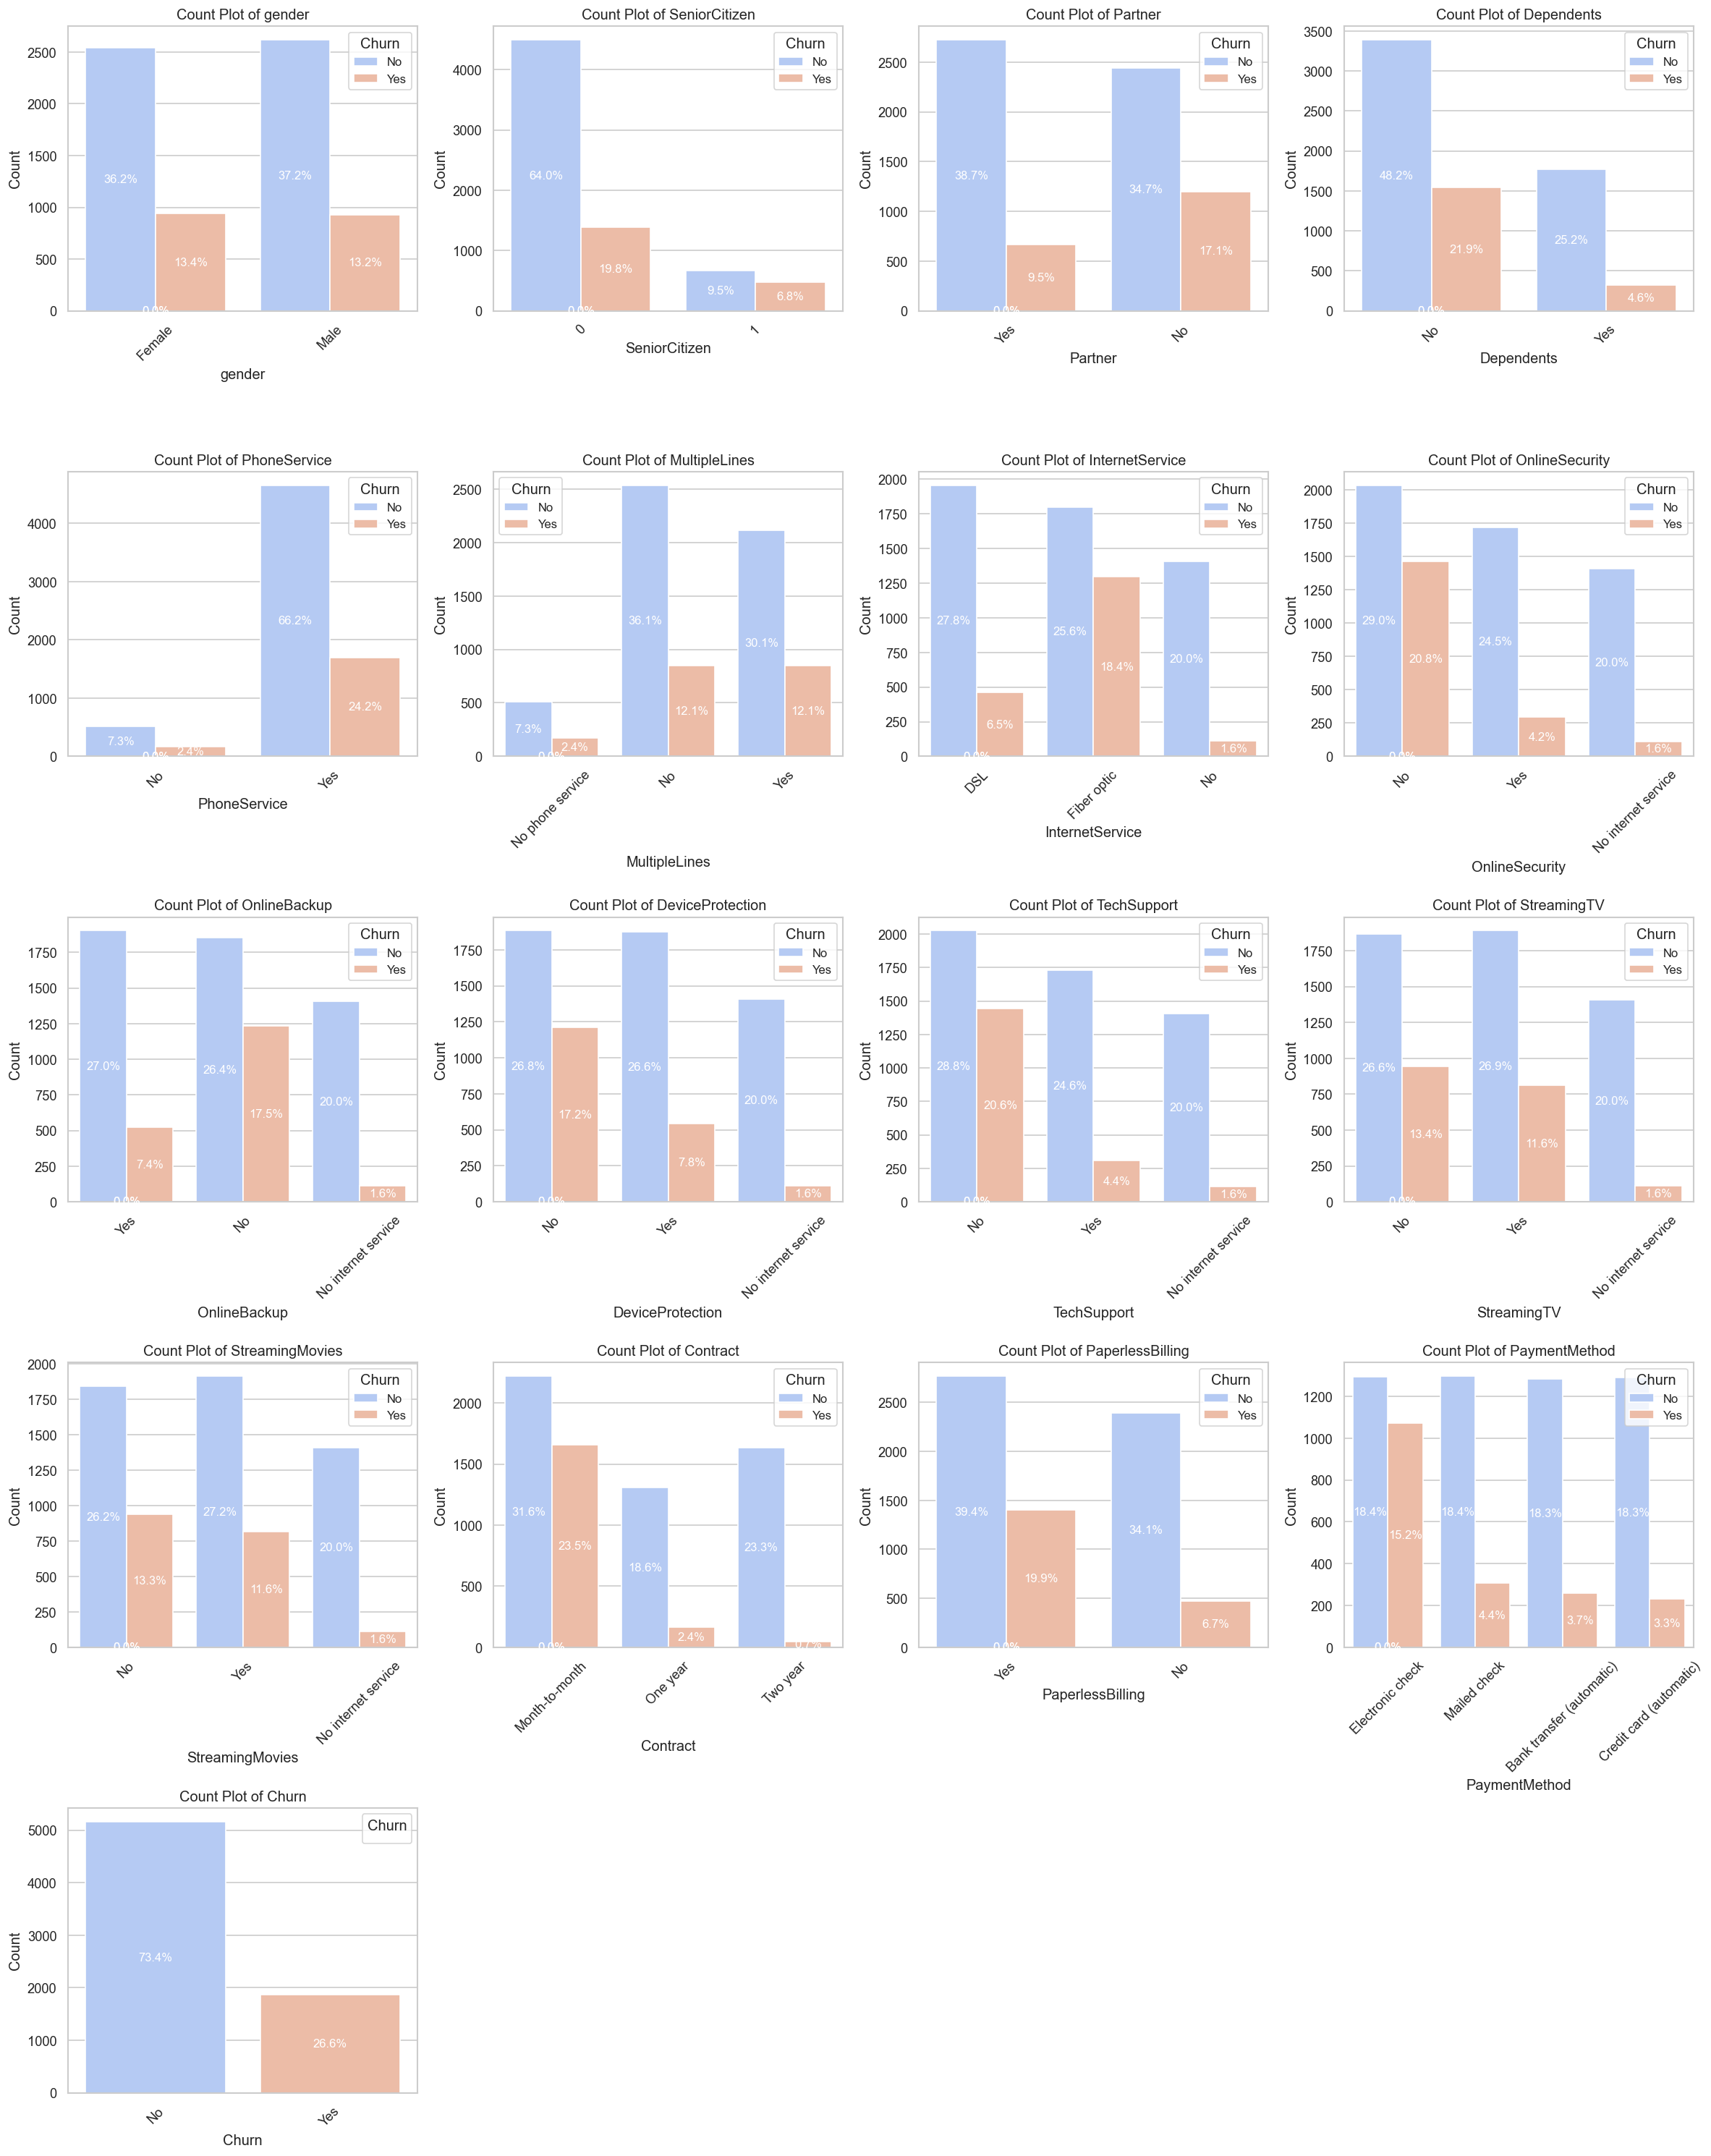

In [16]:
# List of categorical columns to analyze
categorical_columns = [
    "gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService",
    "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
    "Contract", "PaperlessBilling", "PaymentMethod", "Churn"
]

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Determine the number of rows needed for the subplots
n_cols = 4
n_rows = len(categorical_columns) // n_cols + (len(categorical_columns) % n_cols > 0)

# Create a figure to hold the subplots with high DPI for better resolution
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows), dpi=120)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Function to annotate bars with percentage inside the bars
def annotate_bars(ax, feature):
    total = df[feature].value_counts().sum()
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() / 2
        ax.text(x, y, percentage, ha='center', va='center', color='white', fontsize=10)

# Loop through the categorical columns and create count plots with percentages
for i, column in enumerate(categorical_columns):
    ax = sns.countplot(x=column, data=df, ax=axes[i], hue='Churn', palette="coolwarm")
    axes[i].set_title(f'Count Plot of {column}', fontsize=12)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Churn', loc='best', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    annotate_bars(axes[i], column)  # Annotate bars with percentage

# Hide any unused subplot axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout spacing
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tight_layout()
plt.show()


## Evaluating Class Balance

Given that the target column **`Churn`** represents binary outcomes (`No` or `Yes`), this constitutes a binary classification problem. It's crucial to assess the class balance, as imbalances can significantly impact model performance. 

Class counts:
No: 5163
Yes: 1869

Class percentages:
No: 73.42%
Yes: 26.58%


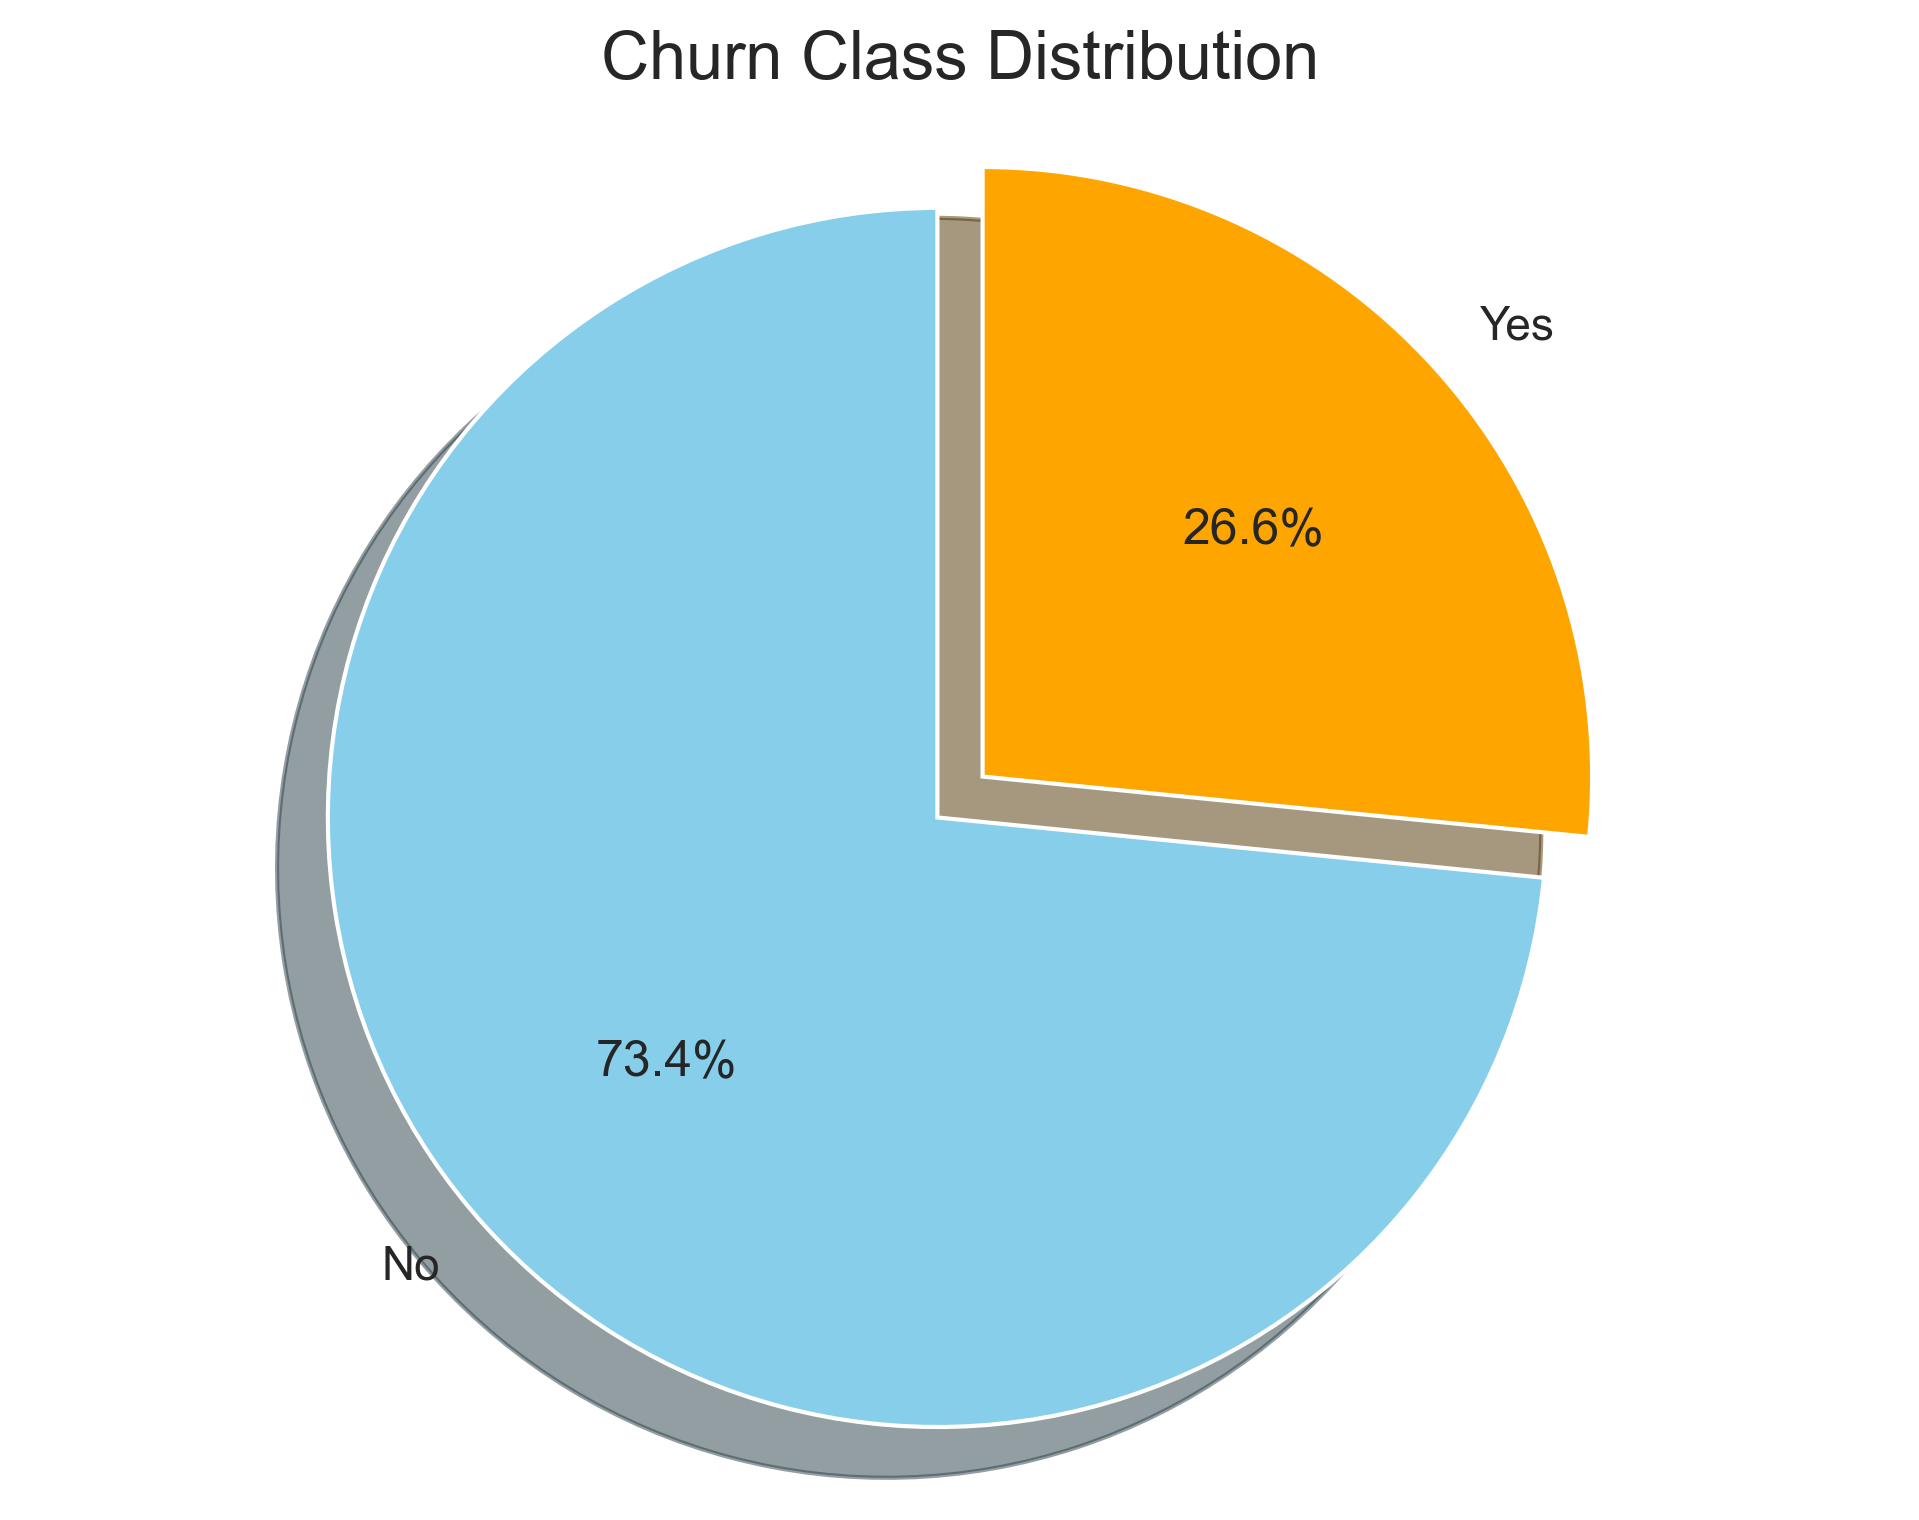

In [17]:
# Calculate the percentage of each class
class_counts = df.groupby('Churn').size()
class_percentages = class_counts / class_counts.sum() * 100

# Print statements
print("Class counts:")
for churn_status, count in class_counts.items():
    print(f"{churn_status}: {count}")

print("\nClass percentages:")
for churn_status, percentage in class_percentages.items():
    print(f"{churn_status}: {percentage:.2f}%")


# Use the version-specific seaborn style
plt.style.use('seaborn-v0_8-darkgrid')

# Plotting directly without specifying a style
plt.figure(figsize=(8, 6), dpi=300)  # Adjust the figure size and resolution for higher quality
plt.pie([73.421502, 26.578498], labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0),
        shadow=True, colors=['skyblue', 'orange'])

plt.title('Churn Class Distribution', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

# Display the plot
plt.show()


## Addressing Class Imbalance

The observed data distribution heavily skews towards the "no" class, indicating a significant imbalance.

1. **Impact of Imbalance**:
    - Significant class imbalance observed: 5174 "No" instances vs. 1869 "Yes" instances.
    - Models may favor the majority class ("No"), leading to high overall accuracy but poor predictive power for the minority class ("Yes").
2. **Challenges with Common Strategies**:
    - **Oversampling & Undersampling**: Can introduce bias or lose valuable data.
    - **Synthetic Data Generation (e.g., SMOTE)**: May not capture complex patterns accurately.
3. **Preferred Strategy for Imbalance**:
    - **Adjusting Class Weights**:
        - Directly modifies the model's loss function to emphasize the minority class.
        - Helps the model to learn more from "Yes" instances without losing data or introducing bias.
    - **Imbalance-aware Evaluation Metrics**:
        - Use metrics like Precision-Recall AUC, F1 Score, or Matthews Correlation Coefficient.
        - These metrics provide a balanced view of model performance, focusing on the model's ability to identify the more critical "Yes" instances effectively.
4. **Rationale**:
    - This approach allows for a balanced model training process that improves sensitivity to the minority class.
    - Ensures that the model evaluation aligns more closely with practical business objectives, emphasizing the importance of accurately predicting churn ("Yes" instances).

By concentrating on adjusting class weights and selecting appropriate evaluation metrics, we directly address the imbalance issue. This method maintains data integrity and ensures a fair evaluation, leading to a more effective churn prediction model.

# **Feature Engineering**

Feature engineering is a critical step in the model-building process because it can introduce new information that might improve a model's predictions. I have created following new features:

-  [ ] **`AverageMonthlyCharges`**: It's common for customers to have variations in their charges throughout their tenure. This feature represents the average spend per month.
- [ ] **`TenureGroups`**: Grouping tenure into categorical bins could reveal patterns related to customer loyalty and churn rate.

In [18]:
# Create 'AverageMonthlyCharges' by dividing 'TotalCharges' by 'tenure'
# Handle cases where tenure is zero: AverageMonthlyCharges should be the same as MonthlyCharges
df['AverageMonthlyCharges'] = np.where(df['tenure'] != 0, df['TotalCharges'] / df['tenure'], df['MonthlyCharges'])

# Categorize 'tenure' into different groups
df['TenureGroups'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 60, np.inf], labels=['0-1 year', '1-2 years', '2-4 years', '4-5 years', '5+ years'])

# Output the first few rows of the updated DataFrame to verify the new features
print(df[['AverageMonthlyCharges', 'TenureGroups']].head())

   AverageMonthlyCharges TenureGroups
0              29.850000     0-1 year
1              55.573529    2-4 years
2              54.075000     0-1 year
3              40.905556    2-4 years
4              75.825000     0-1 year


# **Data Preprocessing and Cleaning**

 
## **Identify outliers - IQR Method**

The IQR method is based on the distribution of the data. An outlier is defined as a data point that is located outside the whiskers of the box plot.The IQR method identified outliers in the SeniorCitizen column due to its binary nature, which is expected as the IQR method isn't suitable for binary variables. 

In [19]:
# Assuming df is your DataFrame
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Function to find outliers using IQR
def find_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

# Apply the function to each numerical column and print the outliers
for column in numerical_columns:
    outliers = find_outliers_iqr(df, column)
    print(f'Number of outliers in {column}: {len(outliers)}')

Number of outliers in SeniorCitizen: 1142
Number of outliers in tenure: 0
Number of outliers in MonthlyCharges: 0
Number of outliers in TotalCharges: 0
Number of outliers in AverageMonthlyCharges: 0


## **Identify outliers - Z-score Method**

The Z-score method assumes a Gaussian distribution and defines outliers as data points that are far from the mean.


The absence of outliers in tenure, MonthlyCharges, and TotalCharges according to both the IQR and Z-score methods suggests that the values in these numerical columns are within a reasonable range, without extreme deviations from the typical data patterns. This indicates a relatively uniform distribution without unusual spikes for these particular features in the dataset.

In [20]:
# Function to find outliers using Z-scores
def find_outliers_zscore(data, feature):
    z_scores = stats.zscore(data[feature])
    abs_z_scores = np.abs(z_scores)
    outliers = data[abs_z_scores > 3]  # Typically, a Z-score above 3 is considered an outlier
    return outliers

# Apply the function to each numerical column and print the outliers
for column in numerical_columns:
    outliers = find_outliers_zscore(df, column)
    print(f'Number of outliers in {column}: {len(outliers)}')

Number of outliers in SeniorCitizen: 0
Number of outliers in tenure: 0
Number of outliers in MonthlyCharges: 0
Number of outliers in TotalCharges: 0
Number of outliers in AverageMonthlyCharges: 0


## **Encode Categorical Variables**

- [ ] Encode binary variables (**`gender`**, **`Partner`**, **`Dependents`**, **`PhoneService`**, **`PaperlessBilling`**, **`Churn`**) with 0 and 1.
- [ ] Use one-hot encoding for nominal variables with more than two categories (**`MultipleLines`**, **`InternetService`**, **`OnlineSecurity`**, **`OnlineBackup`**, **`DeviceProtection`**, **`TechSupport`**, **`StreamingTV`**, **`StreamingMovies`**, **`Contract`**, **`PaymentMethod`**, **`TenureGroups`**) to prepare them for modeling.
- [ ] Scale Numerical Features: Standardize or normalize **`AverageMonthlyCharges`**,**`tenure`**, **`MonthlyCharges`**, and **`TotalCharges`**.

In [21]:
# List of binary categorical columns to encode as 0 and 1
binary_columns = ["gender", "Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]

# Encode binary categorical variables using LabelEncoder
label_encoder = LabelEncoder()
for col in binary_columns:
    df[col] = label_encoder.fit_transform(df[col])

# List of nominal columns to apply one-hot encoding
nominal_columns = [
    "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
    "Contract", "PaymentMethod", "TenureGroups"
]

# Apply one-hot encoding using get_dummies in pandas
df = pd.get_dummies(df, columns=nominal_columns, drop_first=False, dtype=int)

# List of numerical columns to scale
numerical_columns = ["AverageMonthlyCharges", "tenure", "MonthlyCharges", "TotalCharges"]

# Initialize MinMaxScaler to scale numerical columns to be between 0 and 1
scaler = MinMaxScaler()

# Apply scaler separately for each column
for col in numerical_columns:
    df[col] = df[col].astype(float)  # Ensure data type is float for scaling
    df[col] = scaler.fit_transform(df[[col]])

### **Final Checks**

- [ ] **Final Overview**: Use **`.head()`**, **`.info()`**, and **`.describe()`** to get an overview of the cleaned dataset, ensuring it's ready for model development.

In [22]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroups_0-1 year,TenureGroups_1-2 years,TenureGroups_2-4 years,TenureGroups_4-5 years,TenureGroups_5+ years
0,7590-VHVEG,0,0,1,0,0.000000,0,1,0.115423,0.001275,...,0,0,0,1,0,1,0,0,0,0
1,5575-GNVDE,1,0,0,0,0.464789,1,0,0.385075,0.215867,...,0,0,0,0,1,0,0,1,0,0
2,3668-QPYBK,1,0,0,0,0.014085,1,1,0.354229,0.010310,...,0,0,0,0,1,1,0,0,0,0
3,7795-CFOCW,1,0,0,0,0.619718,0,0,0.239303,0.210241,...,0,1,0,0,0,0,0,1,0,0
4,9237-HQITU,0,0,0,0,0.014085,1,1,0.521891,0.015330,...,0,0,0,1,0,1,0,0,0,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7032 non-null   object 
 1   gender                                   7032 non-null   int64  
 2   SeniorCitizen                            7032 non-null   int64  
 3   Partner                                  7032 non-null   int64  
 4   Dependents                               7032 non-null   int64  
 5   tenure                                   7032 non-null   float64
 6   PhoneService                             7032 non-null   int64  
 7   PaperlessBilling                         7032 non-null   int64  
 8   MonthlyCharges                           7032 non-null   float64
 9   TotalCharges                             7032 non-null   float64
 10  Churn                                    7032 non-nul

In [24]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroups_0-1 year,TenureGroups_1-2 years,TenureGroups_2-4 years,TenureGroups_4-5 years,TenureGroups_5+ years
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.00000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,0.442560,0.903299,0.592719,0.463166,0.261309,0.265785,...,0.239619,0.219283,0.216297,0.336320,0.228100,0.309300,0.14562,0.226678,0.118316,0.200085
std,0.500014,0.368844,0.499729,0.457629,0.345708,0.295571,0.491363,0.299363,0.261571,0.441782,...,0.426881,0.413790,0.411748,0.472483,0.419637,0.462238,0.35275,0.418712,0.323005,0.400092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.112676,1.000000,0.000000,0.172512,0.044155,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.394366,1.000000,1.000000,0.518408,0.159090,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.760563,1.000000,1.000000,0.712562,0.435719,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [25]:
df.columns.to_list()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'AverageMonthlyCharges',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'Pa

In [26]:
df.dtypes

customerID                                  object
gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
AverageMonthlyCharges                      float64
MultipleLines_No                             int64
MultipleLines_No phone service               int64
MultipleLines_Yes                            int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No                           int64
OnlineSecurity_No                            int64
OnlineSecurity_No internet serv

In [27]:
# check for all unique values in each column
for column in df.columns:
    print(f"Unique values in '{column}':", df[column].unique())
    print("Number of unique values:", len(df[column].unique()), "\n\n")

Unique values in 'customerID': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Number of unique values: 7032 


Unique values in 'gender': [0 1]
Number of unique values: 2 


Unique values in 'SeniorCitizen': [0 1]
Number of unique values: 2 


Unique values in 'Partner': [1 0]
Number of unique values: 2 


Unique values in 'Dependents': [0 1]
Number of unique values: 2 


Unique values in 'tenure': [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.5

## **Training Data Preparing**

This code performs the following operations:

- [ ] Splits the data into feature (**`X`**) and label (**`y`**) arrays.
- [ ] Uses **`train_test_split`** twice to create a train set (60% of the data), a validation set (20%), and a test set (20%).
- [ ] Saves the training, validation, and test sets to an **`.npz`** file, which can then be loaded for training.

In [28]:
# Identify features and label
X = df.drop(['Churn', 'customerID'], axis=1)  # Features
y = df['Churn']  # Label

# First split into training and temporary sets (temp will become validation and testing)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Now we have X_train, y_train, X_val, y_val, X_test, and y_test

# Save the arrays as .npz file
np.savez('../data/dataset.npz', X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val, X_test=X_test, y_test=y_test)

# Confirm the file has been saved
print("Arrays saved as dataset.npz")


Arrays saved as dataset.npz


### Saving Pre-processed Dataset for Hyperparameter Tuning

To facilitate model tuning and deployment, the pre-processed dataset will be saved to a Google Cloud Storage (GCS) bucket. This step involves the secure storage of transformed data accessible for subsequent machine learning operations.

In [ ]:
# Log in to Google Cloud SDK for authentication to access Google Cloud resources
!gcloud auth login

# Define variables for Project ID, region, and bucket name
PROJECT_ID = "data-science-projects-393906" 
YOUR_REGION = "asia-south1"
BUCKET_NAME = "telco-churn-prediction"

# Set the current Google Cloud Project to ensure all commands apply to this project
!gcloud config set project {PROJECT_ID}

# Create a new GCS bucket in the specified region.
# This bucket will be used to store the pre-processed data.
!gsutil mb -l {YOUR_REGION} gs://{BUCKET_NAME}

# Upload the pre-processed dataset to the GCS bucket
# The dataset is stored as an .npz file which allows for efficient storage of large arrays
!gsutil cp ../data/dataset.npz gs://{BUCKET_NAME}